## Import Packages and load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
boston = load_boston()
X = boston['data']
y = boston['target']

## Train Test Split (70/30)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## GridSearch with Cross-Validation for best parameters
Random Forest Regressor

In [4]:
rf = RandomForestRegressor(random_state=0)

In [5]:
param_grid = {
    'max_depth': [5, 10, 50, 100, None],
    'n_estimators': [50, 100, 500],
    'ccp_alpha': np.arange(0, .1, .01)}

In [8]:
grid_search = GridSearchCV(rf,
                           param_grid,  
                           cv=5,
                           n_jobs=-1,  
                           verbose=2,
                           return_train_score=True)

In [9]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  2.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

### Calculate Test Score with best Parameters

In [10]:
print('Test Set Score: {:.2f}'.format(grid_search.score(X_test, y_test)))

Test Set Score: 0.86


### Show best Parameters

In [11]:
print('Best Parameters: {}'.format(grid_search.best_params_))
print('Best cross-validation score: {:.2f}'.format(grid_search.best_score_))

Best Parameters: {'ccp_alpha': 0.01, 'max_depth': 10, 'n_estimators': 50}
Best cross-validation score: 0.85


In [12]:
print('Best estimator:\n{}'.format(grid_search.best_estimator_))

Best estimator:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.01, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)


## Plot Feature Importances

In [13]:
model = RandomForestRegressor(**grid_search.best_params_)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.01, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

LSTAT (lower status %) and RM (number of rooms) combined importance of ~80%

CRIM       0.031335
ZN         0.000927
INDUS      0.007472
CHAS       0.001410
NOX        0.027861
RM         0.323680
AGE        0.011605
DIS        0.056579
RAD        0.005457
TAX        0.017300
PTRATIO    0.020137
B          0.010053
LSTAT      0.486184
dtype: float64


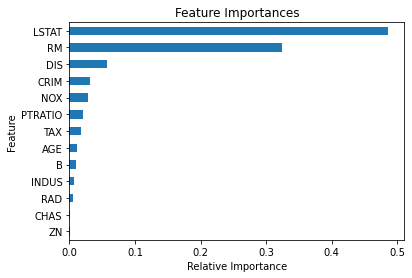

In [23]:
n_features = boston.data.shape[1]
feat_importances = pd.Series(model.feature_importances_, index=boston.feature_names)
print('LSTAT (lower status %) and RM (number of rooms) combined importance of ~80%')
print()
print(feat_importances)
feat_importances.nlargest(n_features).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()